# Learning Jammers: Multi-User
In this notebook, we will evaluate Multi-User performance of our learning algorithms

In [1]:
import os
# import drjit
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

In [2]:
# common parameters
model_parameters = {}
jammer_parameters = {}
model_parameters["perfect_csi"] = False
model_parameters["num_ut"] = 1
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = 1.0
model_parameters["jammer_mitigation"] = "pos"
model_parameters["jammer_mitigation_dimensionality"] = 1
model_parameters["num_silent_pilot_symbols"] = 4
jammer_parameters["trainable"] = True
model_parameters["jammer_parameters"] = jammer_parameters

### Integrated vs Variable Constraint

In [10]:
sim.MAX_MC_ITER = 150
sim.BATCH_SIZE = 4
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 128])
num_ues = np.arange(1, 5, dtype=np.int32)
for num_ue in num_ues:
    filename = f"weights/ue_{num_ue}_relufix.pickle"
    model = Model(**{**model_parameters, "num_ut": num_ue})
    load_weights(model, filename)
    simulate_model(model, f"{num_ue} UE(s), integrated")
for num_ue in num_ues:
    filename = f"weights/ue_{num_ue}_constraint.pickle"
    model = Model(**{**model_parameters, "num_ut": num_ue})
    load_weights(model, filename)
    simulate_model(model, f"{num_ue} UE(s), variable constraint")

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 3.2812e-01 | 1.0000e+00 |      453587 |     1382400 |          600 |         600 |        19.0 |reached max iter       
   -3.571 | 3.2322e-01 | 1.0000e+00 |      446824 |     1382400 |          600 |         600 |         7.9 |reached max iter       
   -2.143 | 3.2005e-01 | 1.0000e+00 |      442436 |     1382400 |          600 |         600 |         8.9 |reached max iter       
   -0.714 | 3.1651e-01 | 1.0000e+00 |      437540 |     1382400 |          600 |         600 |         9.5 |reached max iter       
    0.714 | 3.1368e-01 | 1.0000e+00 |      433635 |     1382400 |          600 |         600 |         9.8 |reached max iter       
    2.143 | 3.1206e-01 | 1.0000e+00 |      431390 |     1382400 |          600 |     

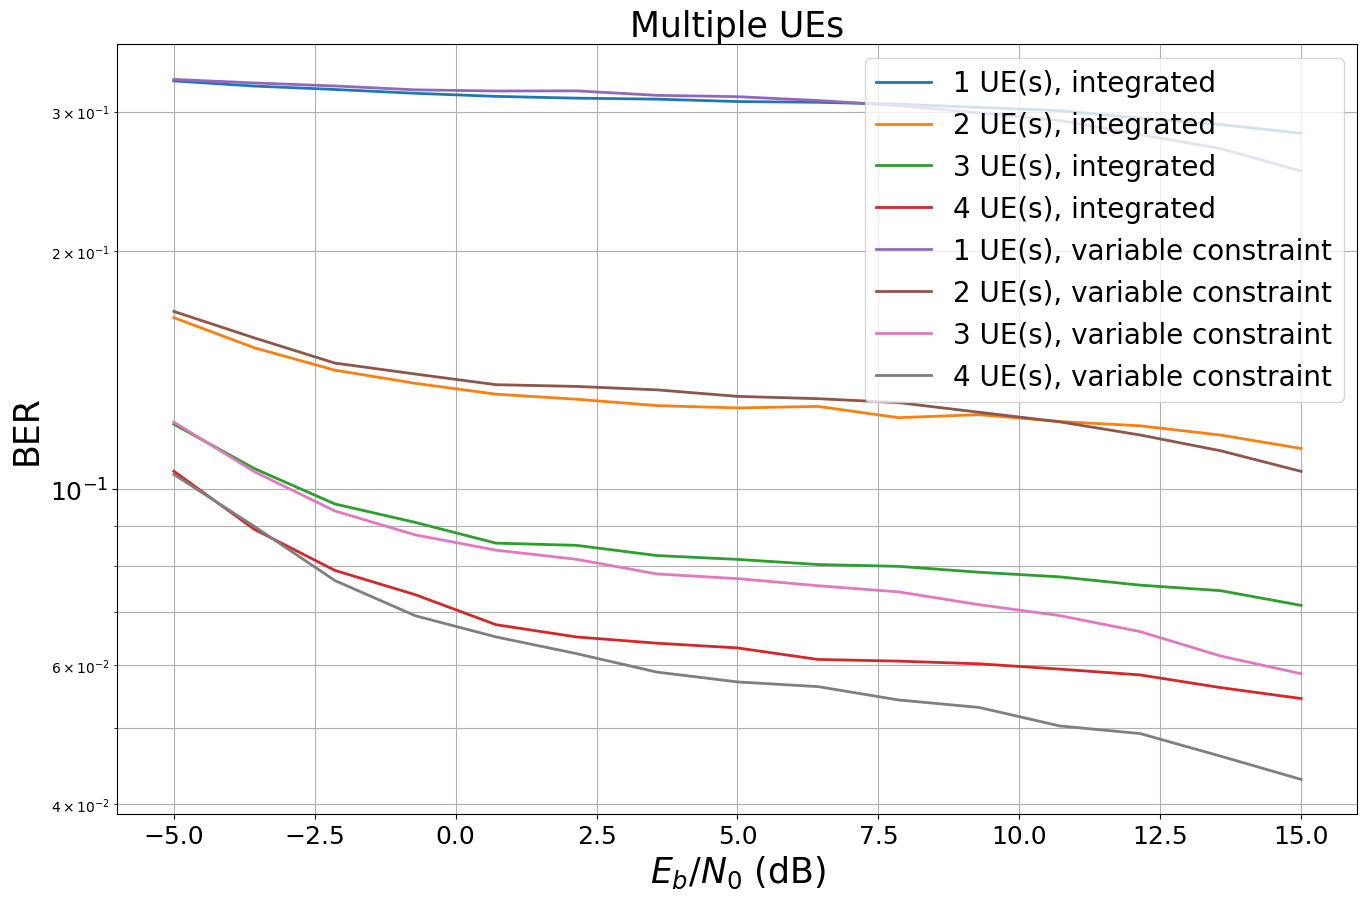

In [23]:
ber_plots.title = "Multiple UEs"
ber_plots()

In [25]:
for num_ue in num_ues:
    filename = f"weights/ue_{num_ue}_relufix_constraint.pickle"
    model = Model(**{**model_parameters, "num_ut": num_ue})
    load_weights(model, filename)
    # c.b.n: can be negative
    simulate_model(model, f"{num_ue} UE(s), variable constraint (c.b.n.)")

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 3.2631e-01 | 1.0000e+00 |      451086 |     1382400 |          600 |         600 |        20.5 |reached max iter       
   -3.571 | 3.2125e-01 | 1.0000e+00 |      444102 |     1382400 |          600 |         600 |        14.7 |reached max iter       
   -2.143 | 3.1823e-01 | 1.0000e+00 |      439927 |     1382400 |          600 |         600 |        14.7 |reached max iter       
   -0.714 | 3.1430e-01 | 1.0000e+00 |      434484 |     1382400 |          600 |         600 |        14.7 |reached max iter       
    0.714 | 3.1179e-01 | 1.0000e+00 |      431020 |     1382400 |          600 |         600 |        15.4 |reached max iter       
    2.143 | 3.0882e-01 | 1.0000e+00 |      426915 |     1382400 |          600 |     

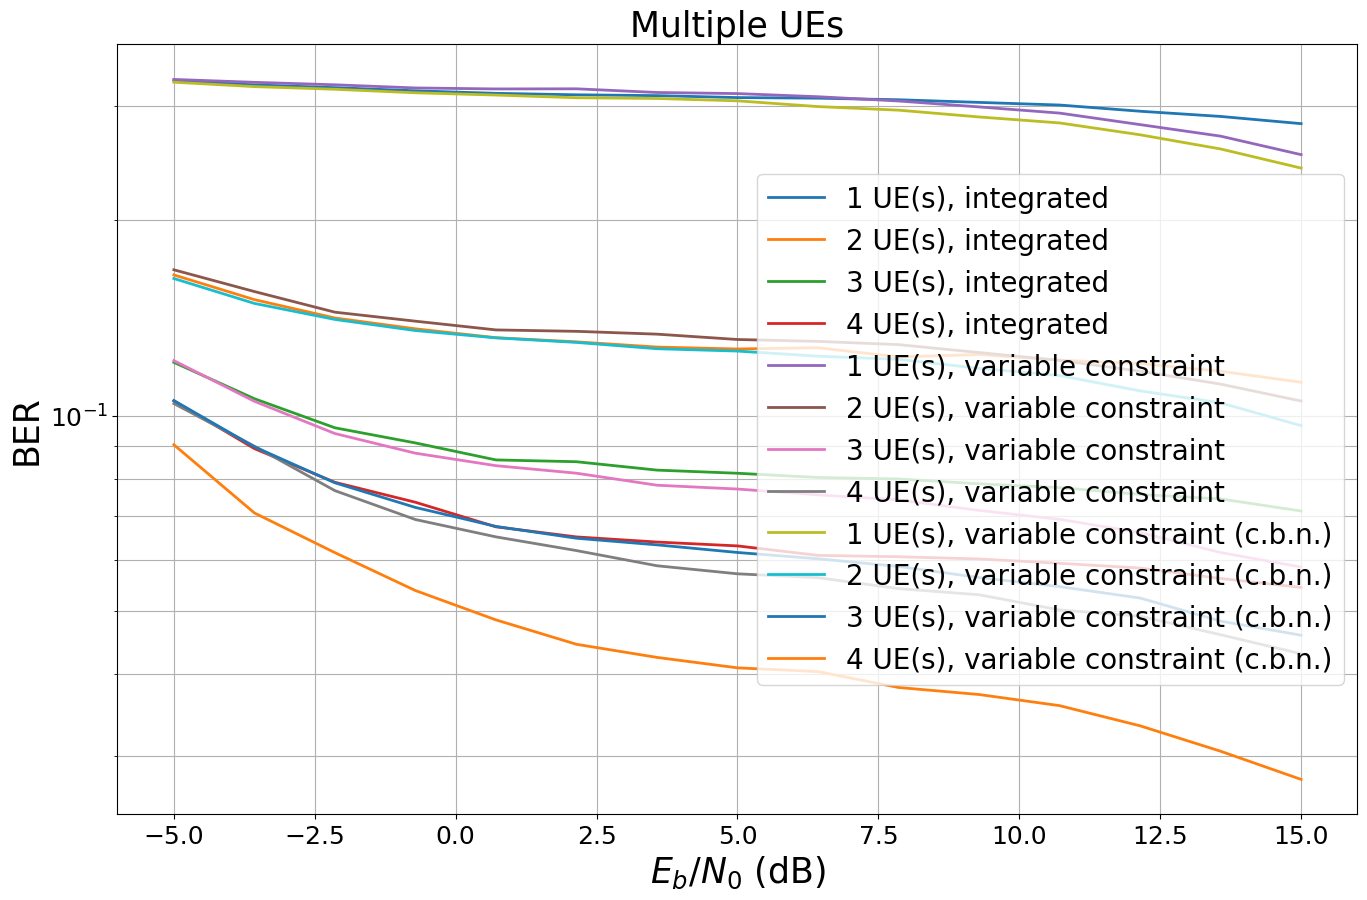

In [26]:
ber_plots.title = "Multiple UEs"
ber_plots()

### Comparison with Symbol Weight Learning

Comparison of best result (integrated constraint) against same setup but with symboltime-only weights.

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 3.3661e-01 | 1.0000e+00 |      465324 |     1382400 |          600 |         600 |        21.4 |reached max iter       
   -3.571 | 3.3319e-01 | 1.0000e+00 |      460597 |     1382400 |          600 |         600 |        15.5 |reached max iter       
   -2.143 | 3.3054e-01 | 1.0000e+00 |      456944 |     1382400 |          600 |         600 |        15.7 |reached max iter       
   -0.714 | 3.2772e-01 | 1.0000e+00 |      453039 |     1382400 |          600 |         600 |        15.9 |reached max iter       
    0.714 | 3.2604e-01 | 1.0000e+00 |      450714 |     1382400 |          600 |         600 |        15.8 |reached max iter       
    2.143 | 3.2509e-01 | 1.0000e+00 |      449403 |     1382400 |          600 |     

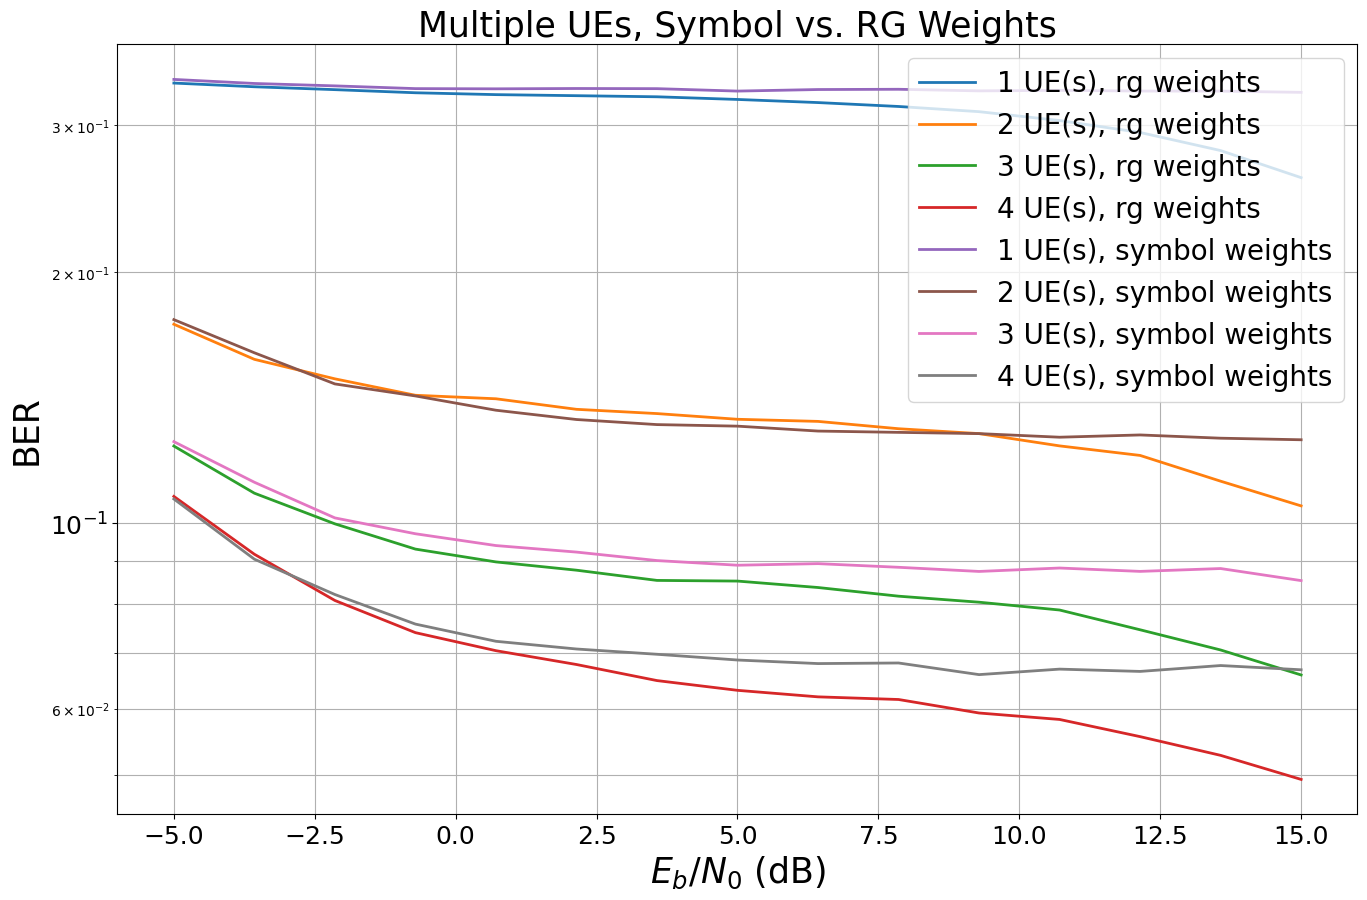

In [8]:
ber_plots.reset()
sim.MAX_MC_ITER = 150
sim.BATCH_SIZE = 4
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 128])
num_ues = np.arange(1, 5, dtype=np.int32)
for num_ue in num_ues:
    filename = f"weights/ue_{num_ue}_relufix.pickle"
    model = Model(**{**model_parameters, "num_ut": num_ue})
    load_weights(model, filename)
    simulate_model(model, f"{num_ue} UE(s), rg weights")
jammer_parameters["trainable_mask"] = tf.ones([14, 1])
for num_ue in num_ues:
    filename = f"weights/ue_{num_ue}_relufix_symbol_weights.pickle"
    model = Model(**{**model_parameters, "num_ut": num_ue})
    load_weights(model, filename)
    simulate_model(model, f"{num_ue} UE(s), symbol weights")
ber_plots.title = "Multiple UEs, Symbol vs. RG Weights"
ber_plots()

### Number of Users vs. Jammer Power

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 2.7636e-01 | 1.0000e+00 |      382038 |     1382400 |          600 |         600 |        14.5 |reached max iter       
   -3.571 | 2.6597e-01 | 1.0000e+00 |      367681 |     1382400 |          600 |         600 |         8.7 |reached max iter       
   -2.143 | 2.5954e-01 | 1.0000e+00 |      358789 |     1382400 |          600 |         600 |         8.6 |reached max iter       
   -0.714 | 2.5293e-01 | 1.0000e+00 |      349656 |     1382400 |          600 |         600 |         8.5 |reached max iter       
    0.714 | 2.5096e-01 | 1.0000e+00 |      346921 |     1382400 |          600 |         600 |         8.6 |reached max iter       
    2.143 | 2.4940e-01 | 1.0000e+00 |      344777 |     1382400 |          600 |     

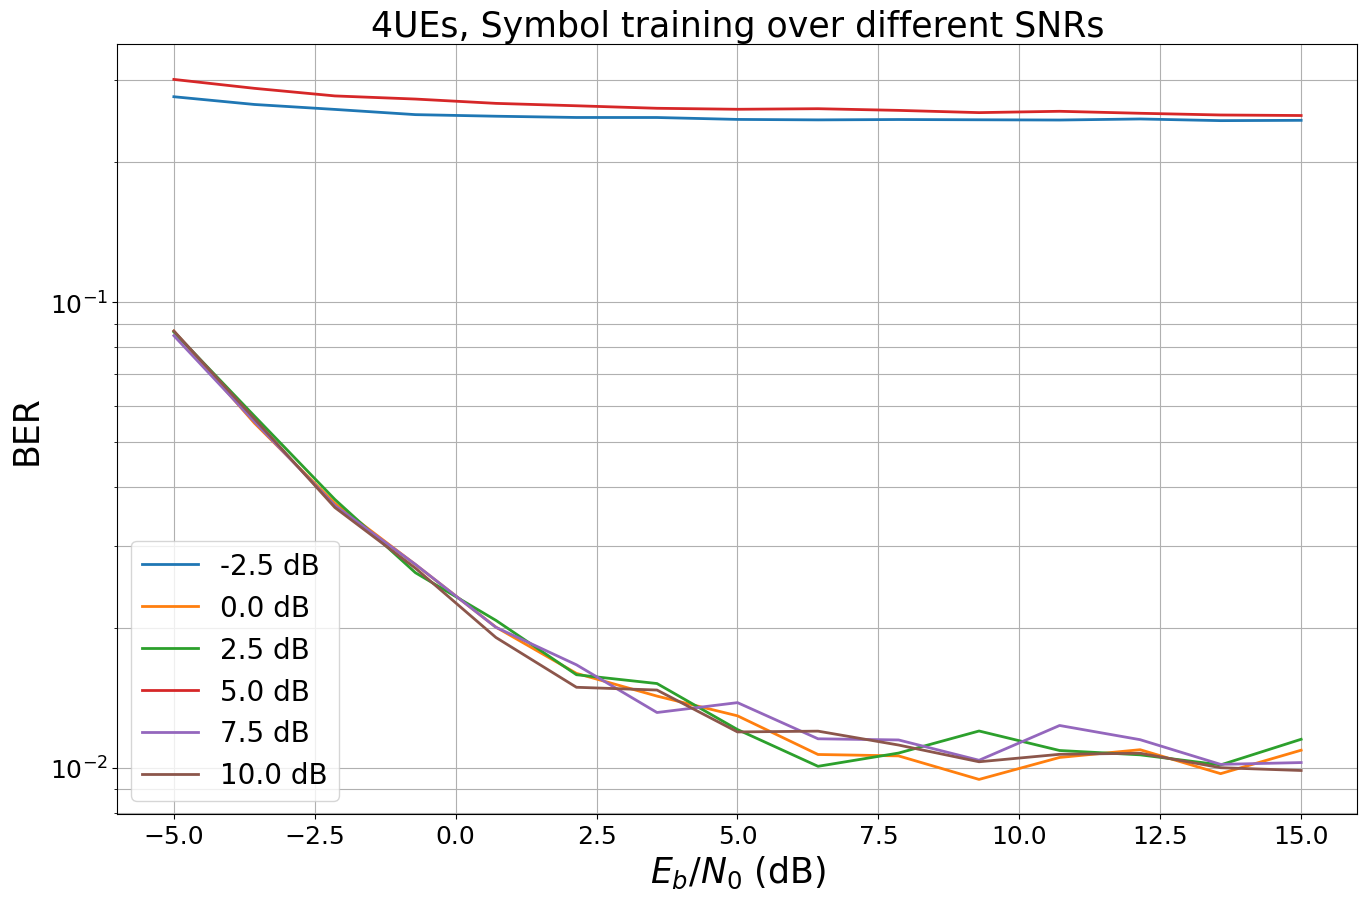

In [5]:
ber_plots.reset()
sim.MAX_MC_ITER = 150
sim.BATCH_SIZE = 4
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 1])
snrs = np.arange(-2.5, 10.5, 2.5, dtype=np.float32)
for snr in snrs:
    filename = f"weights/ue_4_{snr}dB.pickle"
    model = Model(**{**model_parameters, "num_ut": 4})
    load_weights(model, filename)
    simulate_model(model, f"{snr} dB")
ber_plots.title = "4UEs, Symbol training over different SNRs"
ber_plots()

In [5]:
num_ut = range(1, 9)
jammer_power = np.arange(-2.5, 15.1, 2.5, dtype=np.float32)
bers = np.zeros([len(num_ut), len(jammer_power)])
for i in range(len(num_ut)):
    for j in range(len(jammer_power)):
        n = num_ut[i]
        p = jammer_power[j]
        my_model_parameters = {**model_parameters, "num_ut": n, "jammer_power": db_to_linear(p),
                               "num_ofdm_symbols": 18, "fft_size": 64,
                               "jammer_parameters": {**jammer_parameters, "trainable_mask": tf.ones([18, 1], dtype=tf.bool)}}
        filename = f"weights/grid/ue_{n}_power_{p}dB.pickle"
        model = Model(**my_model_parameters)
        load_weights(model, filename)
        ber = sionna.utils.BitErrorRate()
        for s in range(150):
            # BATCH_SIZE, ebno_db
            b, llr = model(8, 5.0)
            b_hat = sionna.utils.hard_decisions(llr)
            ber.update_state(b, b_hat)
        print(f"{n} UEs, {p} dB: {ber.result().numpy()}")
        bers[i, j] = ber.result().numpy()


1 UEs, -2.5 dB: 0.24985827505588531
1 UEs, 0.0 dB: 0.3429807722568512
1 UEs, 2.5 dB: 0.4055774211883545
1 UEs, 5.0 dB: 0.4435576796531677
1 UEs, 7.5 dB: 0.4681815803050995
1 UEs, 10.0 dB: 0.4811698794364929
1 UEs, 12.5 dB: 0.48852264881134033
1 UEs, 15.0 dB: 0.4898187220096588
2 UEs, -2.5 dB: 0.10608615726232529
2 UEs, 0.0 dB: 0.1445947289466858
2 UEs, 2.5 dB: 0.18897704780101776
2 UEs, 5.0 dB: 0.21670220792293549
2 UEs, 7.5 dB: 0.267534464597702
2 UEs, 10.0 dB: 0.31401094794273376
2 UEs, 12.5 dB: 0.35419678688049316
2 UEs, 15.0 dB: 0.3881022036075592
3 UEs, -2.5 dB: 0.053429409861564636
3 UEs, 0.0 dB: 0.08415798842906952
3 UEs, 2.5 dB: 0.12177635729312897
3 UEs, 5.0 dB: 0.15662483870983124
3 UEs, 7.5 dB: 0.21251164376735687
3 UEs, 10.0 dB: 0.26505425572395325
3 UEs, 12.5 dB: 0.3127077519893646
3 UEs, 15.0 dB: 0.3534071147441864
4 UEs, -2.5 dB: 0.034748535603284836
4 UEs, 0.0 dB: 0.06584016978740692
4 UEs, 2.5 dB: 0.09257210046052933
4 UEs, 5.0 dB: 0.13107812404632568
4 UEs, 7.5 dB: 0.

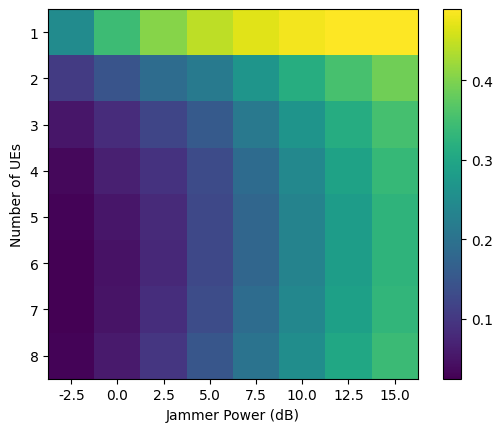

In [20]:
fig, ax = plt.subplots()
im = ax.imshow(bers)
ax.set_xticks(np.arange(len(jammer_power)))
ax.set_xticklabels(jammer_power)
plt.xlabel("Jammer Power (dB)")
ax.set_yticks(np.arange(len(num_ut)))
ax.set_yticklabels(num_ut)
plt.ylabel("Number of UEs")
fig.colorbar(im, fraction=0.05)
plt.show()